In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation

In [3]:
class RoadSignClassifier:
    def createCNN(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(filters=8, kernel_size=(5, 5), input_shape=inputShape, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
 
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation="relu"))
        model.add(Dense(classes, activation="softmax"))
        return model
    
    def createCustomActivationCNN(width, height, depth, classes, activation):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(filters=8, kernel_size=(5, 5), input_shape=inputShape, activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=activation))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
 
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=activation))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=activation))
        model.add(BatchNormalization())
        
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation=activation))
        model.add(Dense(classes, activation="softmax"))
        return model
    
    def createCNN_without_dropout(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(filters=8, kernel_size=(5, 5), input_shape=inputShape, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
 
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        
        model.add(Flatten())
        model.add(Dense(512, activation="relu"))
        model.add(Dense(classes, activation="softmax"))
        return model

In [4]:
def load_data(dataset, csv):
    images = []
    classes = []
    rows = pd.read_csv(dataset + csv)
    rows = rows.sample(frac=1).reset_index(drop=True)

    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(dataset, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (30, 30), 3)

        R, G, B = cv2.split(image_rs)

        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)

        new_image = cv2.merge((img_r, img_g, img_b))

        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)

    X = np.array(images)
    y = np.array(classes)
    return X, y

In [5]:
train_data = r"/home/sspc/Desktop/gtsrb-german-traffic-sign"
test_data = r"/home/sspc/Desktop/gtsrb-german-traffic-sign"
(train_X, train_Y) = load_data(train_data, "/Train.csv")
(test_X, test_Y) = load_data(test_data, "/Test.csv")

loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 4500
loaded: 5000
loaded: 5500
loaded: 6000
loaded: 6500
loaded: 7000
loaded: 7500
loaded: 8000
loaded: 8500
loaded: 9000
loaded: 9500
loaded: 10000
loaded: 10500
loaded: 11000
loaded: 11500
loaded: 12000
loaded: 12500
loaded: 13000
loaded: 13500
loaded: 14000
loaded: 14500
loaded: 15000
loaded: 15500
loaded: 16000
loaded: 16500
loaded: 17000
loaded: 17500
loaded: 18000
loaded: 18500
loaded: 19000
loaded: 19500
loaded: 20000
loaded: 20500
loaded: 21000
loaded: 21500
loaded: 22000
loaded: 22500
loaded: 23000
loaded: 23500
loaded: 24000
loaded: 24500
loaded: 25000
loaded: 25500
loaded: 26000
loaded: 26500
loaded: 27000
loaded: 27500
loaded: 28000
loaded: 28500
loaded: 29000
loaded: 29500
loaded: 30000
loaded: 30500
loaded: 31000
loaded: 31500
loaded: 32000
loaded: 32500
loaded: 33000
loaded: 33500
loaded: 34000
loaded: 34500
loaded: 35000
loaded: 35500
loaded: 36000
lo

In [6]:
print("UPDATE: Normalizing data")
trainX = train_X.astype("float64") / 255.0
testX = test_X.astype("float64") / 255.0
print("UPDATE: One-Hot Encoding data")
num_labels = len(np.unique(train_Y))
trainY = to_categorical(train_Y)
testY = to_categorical(test_Y)

class_totals = trainY.sum(axis=0)
class_weight = class_totals.max() / class_totals

UPDATE: Normalizing data
UPDATE: One-Hot Encoding data


In [7]:
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)

In [ ]:
learning_rate = 0.001
epochs = 15
batch_size = 64
# model = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)
model_relu = RoadSignClassifier.createCustomActivationCNN(width=30, height=30, depth=3, classes=43,
                                                          activation="relu")
model_tanh = RoadSignClassifier.createCustomActivationCNN(width=30, height=30, depth=3, classes=43,
                                                          activation="tanh")
model_sigmoid = RoadSignClassifier.createCustomActivationCNN(width=30, height=30, depth=3, classes=43,
                                                             activation="sigmoid")
optimizer = Adam(lr=learning_rate, decay=learning_rate / (epochs))

In [ ]:
model_relu.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_relu_fit = model_relu.fit(
                x=trainX,
                y=trainY,
                batch_size=batch_size, 
                epochs=epochs,
                validation_split=0.2,
                class_weight=class_weight,
                verbose=1)

In [ ]:
model_tanh.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_tanh_fit = model_tanh.fit(
                            x=trainX,
                            y=trainY,
                            batch_size=batch_size, 
                            epochs=epochs,
                            validation_split=0.2,
                            class_weight=class_weight,
                            verbose=1)

In [ ]:
model_sigmoid.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_sigmoid_fit = model_sigmoid.fit(
                                    x=trainX,
                                    y=trainY,
                                    batch_size=batch_size, 
                                    epochs=epochs,
                                    validation_split=0.2,
                                    class_weight=class_weight,
                                    verbose=1)

In [ ]:
history_relu = model_relu_fit.history
history_tanh = model_sigmoid_fit.history
history_sigmoid = model_tanh_fit.history

plt.figure()
plt.title("Without Augmentation")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(history_relu['val_accuracy'])
plt.plot(history_tanh['val_accuracy'])
plt.plot(history_sigmoid['val_accuracy'])
plt.legend(['relu', 'tanh', 'sigmoid'])

In [ ]:
test_loss_relu, test_acc_relu = model_relu.evaluate(testX, testY, verbose=1)
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(testX, testY, verbose=1)
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(testX, testY, verbose=1)

In [ ]:
learning_rate = 0.001
epochs = 30
batch_size = 64
model_Adam = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)
model_SGD = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)

In [ ]:
optimizer = Adam(lr=learning_rate, decay=learning_rate / (epochs))
model_Adam.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_Adam_fit = model_Adam.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

In [ ]:
optimizer = SGD(lr=learning_rate, decay=learning_rate / (epochs))
model_SGD.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_SGD_fit = model_SGD.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

In [ ]:
history_adam = model_Adam_fit.history
history_sgd = model_SGD_fit.history

plt.figure()
plt.title("Without Augmentation")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(history_adam['val_accuracy'])
plt.plot(history_sgd['val_accuracy'])
plt.legend(['adam', 'sgd'])

In [ ]:
test_loss_adam, test_acc_adam = model_Adam.evaluate(testX, testY, verbose=1)
test_loss_sgd, test_acc_sgd = model_SGD.evaluate(testX, testY, verbose=1)

In [ ]:
learning_rate = 0.001
epochs = 100
batch_size = 64
model_with_drop_out = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)
model_without_drop_out = RoadSignClassifier.createCNN_without_dropout(width=30, height=30, depth=3, classes=43)


In [ ]:
model_with_drop_out.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_with_drop_out_fit = model_with_drop_out.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

In [ ]:
model_without_drop_out.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_without_drop_out_fit = model_without_drop_out.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

In [ ]:
history_with_drop_out = model_with_drop_out_fit.history
history_without_drop_out = model_without_drop_out_fit.history

plt.figure()
plt.title("Drop out Efecct")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history_with_drop_out['accuracy'])
plt.plot(history_without_drop_out['accuracy'])
plt.legend(['withDropOut', 'WithOutDropOut'])

plt.figure()
plt.title("Drop out Efecct")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(history_with_drop_out['val_accuracy'])
plt.plot(history_without_drop_out['val_accuracy'])
plt.legend(['withDropOut', 'WithOutDropOut'])

In [ ]:
test_loss_with_drop_out, test_acc_with_drop_out = model_with_drop_out.evaluate(testX, testY, verbose=1)
test_loss_wihtout_drop_out, test_acc_wihtout_drop_out = model_without_drop_out.evaluate(testX, testY, verbose=1)

In [ ]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_fit = model.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

In [ ]:
test_loss, test_acc = model.evaluate(testX, testY, verbose=1)

In [ ]:
history = model_fit.history

In [ ]:
plt.title("Without Augmentation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.figure()
plt.title("Without Augmentation")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

In [ ]:
def plot_confusion_matrix(cm,
                          target_names = ['1', '2', '3', '4'],
                          title = 'Confusion matrix',
                          cmap = None,
                          normalize = False):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize = (14, 12))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


test_prediction = model.predict_classes(testX)
cm = confusion_matrix(y_true=test_Y, y_pred=test_prediction)
print("Matrix = ")
print(cm)

names = []
for i in range(43):
    names.append(i)
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = names,
                      title        = "Confusion Matrix")

In [8]:
learning_rate = 0.001
epochs = 100
batch_size = 64
optimizer = Adam(lr=learning_rate, decay=learning_rate / (epochs))
model_without_augment = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)
model_with_augment = RoadSignClassifier.createCNN(width=30, height=30, depth=3, classes=43)


In [9]:
model_without_augment.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_without_augment_fit = model_without_augment.fit(
    x=trainX,
    y=trainY,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1)

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 23s 737us/sample - loss: 0.7326 - accuracy: 0.7880 - val_loss: 0.2291 - val_accuracy: 0.9268
Epoch 2/100
31367/31367 [==============================] - 21s 669us/sample - loss: 0.2132 - accuracy: 0.9323 - val_loss: 0.1494 - val_accuracy: 0.9524
Epoch 3/100
31367/31367 [==============================] - 21s 665us/sample - loss: 0.1386 - accuracy: 0.9557 - val_loss: 0.1834 - val_accuracy: 0.9461
Epoch 4/100
31367/31367 [==============================] - 20s 640us/sample - loss: 0.1150 - accuracy: 0.9629 - val_loss: 0.0928 - val_accuracy: 0.9733
Epoch 5/100
31367/31367 [==============================] - 21s 654us/sample - loss: 0.0861 - accuracy: 0.9714 - val_loss: 0.1306 - val_accuracy: 0.9609
Epoch 6/100
31367/31367 [==============================] - 20s 654us/sample - loss: 0.0773 - accuracy: 0.9745 - val_loss: 0.1300 - val_accuracy: 0.9621
Epoch 7/100
31367/31367 [==============

31367/31367 [==============================] - 22s 699us/sample - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0440 - val_accuracy: 0.9913
Epoch 55/100
31367/31367 [==============================] - 24s 780us/sample - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0442 - val_accuracy: 0.9908
Epoch 56/100
31367/31367 [==============================] - 20s 648us/sample - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0438 - val_accuracy: 0.9908
Epoch 57/100
31367/31367 [==============================] - 21s 658us/sample - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0542 - val_accuracy: 0.9880
Epoch 58/100
31367/31367 [==============================] - 21s 679us/sample - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0399 - val_accuracy: 0.9925
Epoch 59/100
31367/31367 [==============================] - 33s 1ms/sample - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0457 - val_accuracy: 0.9926
Epoch 60/100
31367/31367 [==============================] - 22s 694us/sample - loss: 0.0092 - acc

In [10]:
model_with_augment.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_with_augment_fit = model_without_augment.fit(
    data_aug.flow(trainX, trainY, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(testX, testY),
    class_weight=class_weight,
    verbose=1)

  ...
    to  
  ['...']
Train for 613 steps, validate on 12630 samples
Epoch 1/100
613/613 [==============================] - 31s 51ms/step - loss: 0.7173 - accuracy: 0.8220 - val_loss: 0.1596 - val_accuracy: 0.9556
Epoch 2/100
613/613 [==============================] - 29s 48ms/step - loss: 0.3612 - accuracy: 0.8916 - val_loss: 0.1523 - val_accuracy: 0.9574
Epoch 3/100
613/613 [==============================] - 30s 50ms/step - loss: 0.2709 - accuracy: 0.9161 - val_loss: 0.1268 - val_accuracy: 0.9616
Epoch 4/100
613/613 [==============================] - 32s 53ms/step - loss: 0.2302 - accuracy: 0.9295 - val_loss: 0.1392 - val_accuracy: 0.9623
Epoch 5/100
613/613 [==============================] - 43s 70ms/step - loss: 0.2029 - accuracy: 0.9367 - val_loss: 0.1248 - val_accuracy: 0.9658
Epoch 6/100
613/613 [==============================] - 34s 55ms/step - loss: 0.1778 - accuracy: 0.9443 - val_loss: 0.1294 - val_accuracy: 0.9629
Epoch 7/100
613/613 [==============================] - 32s

613/613 [==============================] - 27s 43ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.1230 - val_accuracy: 0.9715
Epoch 57/100
613/613 [==============================] - 27s 44ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.1056 - val_accuracy: 0.9739
Epoch 58/100
613/613 [==============================] - 27s 44ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.1564 - val_accuracy: 0.9658
Epoch 59/100
613/613 [==============================] - 27s 44ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.1312 - val_accuracy: 0.9691
Epoch 60/100
613/613 [==============================] - 27s 44ms/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 0.1309 - val_accuracy: 0.9689
Epoch 61/100
613/613 [==============================] - 27s 45ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.1172 - val_accuracy: 0.9709
Epoch 62/100
613/613 [==============================] - 27s 44ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.1275 - val_accuracy

In [11]:
test_loss_without_augment, test_acc_without_augment = model_without_augment.evaluate(testX, testY, verbose=1)
test_loss_with_augment, test_acc_with_augment = model_with_augment.evaluate(testX, testY, verbose=1)

12630/12630 [==============================] - 2s 145us/sample - loss: 3.7596 - accuracy: 0.0769


In [12]:
history_without_augment = model_without_augment_fit.history
history_with_augment = model_with_augment_fit.history

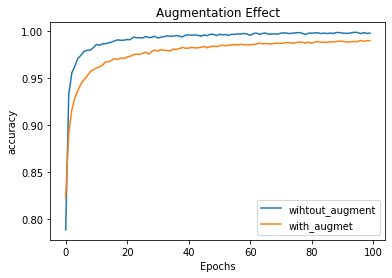

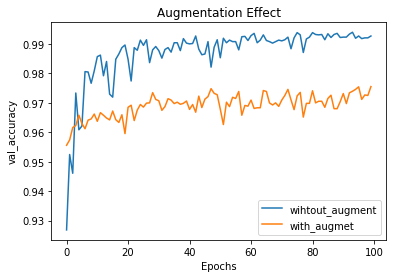

In [14]:
plt.title("Augmentation Effect")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(history_without_augment['accuracy'])
plt.plot(history_with_augment['accuracy'])
plt.legend(['wihtout_augment', 'with_augmet'])

plt.figure()
plt.title("Augmentation Effect")
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(history_without_augment['val_accuracy'])
plt.plot(history_with_augment['val_accuracy'])
plt.legend(['wihtout_augment', 'with_augmet'])